# Business Problem 3

In [1]:
import pandas as pd
import numpy as np
from math import pi
import seaborn as sns
import matplotlib.pyplot as plt

# Q1 Clean The Data

In [2]:
data = pd.read_csv('tech_purchases.csv',encoding='latin1')
data.head(4)

,userId,itemId,Ratings
0,1001,5001,3
1,1001,5002,4
2,1001,5004,5
3,1002,5003,3


# Q.2 Review the data types

In [3]:
data.shape

(28, 3)

In [4]:
data.dtypes

userId     int64
itemId     int64
Ratings    int64
dtype: object

# drop any rows with missing values

In [5]:
purchase_data = data.dropna()
purchase_data.head(4)

,userId,itemId,Ratings
0,1001,5001,3
1,1001,5002,4
2,1001,5004,5
3,1002,5003,3


In [6]:
catalogue_data = pd.read_csv('tech_catalogue.csv',encoding='latin1')
catalogue_data

,ItemId,Product_Name,Category,Sub_Category,Price
0,5001,Samsung S23,Hardware,Phone,950
1,5002,Scase,Accessories,Case,35
2,5003,Apple 15,Hardware,Phone,1100
3,5004,Insurance,Extra,Insurance,99
4,5005,iCase,Accessories,Case,32
5,5006,Lighting Cord,Accessories,Cord,15


In [7]:
catalogue_data.shape

(6, 5)

In [8]:
catalogue_data.dtypes

ItemId           int64
Product_Name    object
Category        object
Sub_Category    object
Price            int64
dtype: object

In [9]:
catalogue = catalogue_data.dropna()

In [10]:
# Selecting a specific item with item ID 5001 from the purchase_data dataset.

item_id = 5001

# Filtering the purchase_data dataset to retrieve only the rows where itemId matches the specified item_id.
item = purchase_data[purchase_data['itemId'] == item_id]

# 3.	Find users who liked the same items (similar users who rated the items above 3).

In [11]:
similar_users = purchase_data[(purchase_data['itemId'] == item_id) 
                        & (purchase_data['Ratings'] > 3)]['userId'].unique() 
similar_users

array([1004, 1009, 1010], dtype=int64)

In [12]:
# Filter the purchase_data dataset to select rows where userId is in the 'similar_users' list and 'Ratings' are greater than 3.
similar_users_recs = purchase_data[(purchase_data['userId'].isin(similar_users)) & (purchase_data['Ratings'] > 3)]['itemId'] 
similar_users_recs

8     5001
9     5004
20    5001
21    5002
22    5001
Name: itemId, dtype: int64

In [13]:
# Calculate the relative frequency of each item by dividing the count of each item by the total number of similar users.
similar_users_recs =similar_users_recs.value_counts() / len(similar_users)
similar_users_recs

5001    1.000000
5004    0.333333
5002    0.333333
Name: itemId, dtype: float64

In [14]:
# Filter the purchase_data dataset to select rows where itemId is in the list of recommended items and Ratings are greater than 3.
all_users = purchase_data[(purchase_data['itemId'].isin(similar_users_recs.index)) 
                    & (purchase_data['Ratings'] > 3)]
all_users

,userId,itemId,Ratings
1,1001,5002,4
2,1001,5004,5
8,1004,5001,4
9,1004,5004,5
12,1005,5004,4
20,1009,5001,4
21,1009,5002,4
22,1010,5001,4


# 4.	Find out how much all users liked all the items (percentages).

In [15]:
# Calculate the relative frequency of each item by dividing the count of each item by the total number of unique users in the selected dataset.

all_users_recs = all_users['itemId'].value_counts() / len(all_users['userId'].unique())
all_users_recs

5004    0.6
5001    0.6
5002    0.4
Name: itemId, dtype: float64

# 5.	Use concatenate to compare similar and all users liked the items (percentages).

In [16]:
rec_per = pd.concat([similar_users_recs, all_users_recs],axis=1)
rec_per.columns = ['similar','all']
rec_per

,similar,all
5001,1.000000,0.6
5004,0.333333,0.6
5002,0.333333,0.4


# 6.	Create a recommendation ‘Score’ (or affinity score) 

In [17]:
rec_per['score'] = rec_per['similar'] / rec_per['all']
rec_per

,similar,all,score
5001,1.000000,0.6,1.666667
5004,0.333333,0.6,0.555556
5002,0.333333,0.4,0.833333


# 7.	Complete the full item details by using merged data from tech_catalogue.csv

# Merging Data

In [18]:
rec_list = rec_per.head(5).merge(catalogue, left_index = True, right_on = 'ItemId')

rec_list

,similar,all,score,ItemId,Product_Name,Category,Sub_Category,Price
0,1.000000,0.6,1.666667,5001,Samsung S23,Hardware,Phone,950
3,0.333333,0.6,0.555556,5004,Insurance,Extra,Insurance,99
1,0.333333,0.4,0.833333,5002,Scase,Accessories,Case,35


# 8. Making list for all items

In [19]:
item_list = rec_list.sort_values(by=['all', 'similar'], ascending=False)
item_list = item_list[['Product_Name', 'Category', 'Sub_Category', 'Price']]

item_list

,Product_Name,Category,Sub_Category,Price
0,Samsung S23,Hardware,Phone,950
3,Insurance,Extra,Insurance,99
1,Scase,Accessories,Case,35


# 9.	Create a new list that only shows the highest recommended item for each item (display the Product Name & Price only).

In [20]:
highest_recommended = item_list.groupby('Category').head().reset_index(drop=True)

# Display the new list
highest_recommended[['Product_Name', 'Price']]

,Product_Name,Price
0,Samsung S23,950
1,Insurance,99
2,Scase,35


# 10.	Include any extra code (or plot any graph) that you think would help Amazine management better interpret this data.

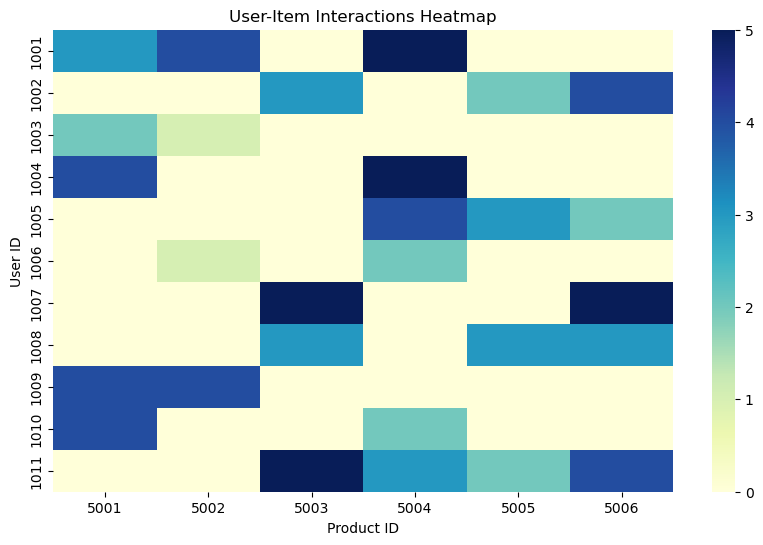

In [21]:
# a user-item matrix from the purchase_data dataset, where rows represent users, columns represent items, and values are Ratings.

user_item_matrix = purchase_data.pivot_table(index='userId', columns='itemId', values='Ratings', fill_value=0)

# a heatmap plot of the user-item matrix for visualizing user-item interactions.

plt.figure(figsize=(10, 6))
sns.heatmap(user_item_matrix, cmap='YlGnBu')
plt.xlabel('Product ID')
plt.ylabel('User ID')
plt.title('User-Item Interactions Heatmap')
plt.show()


# Attempt at these graphs because I thought they looked cool

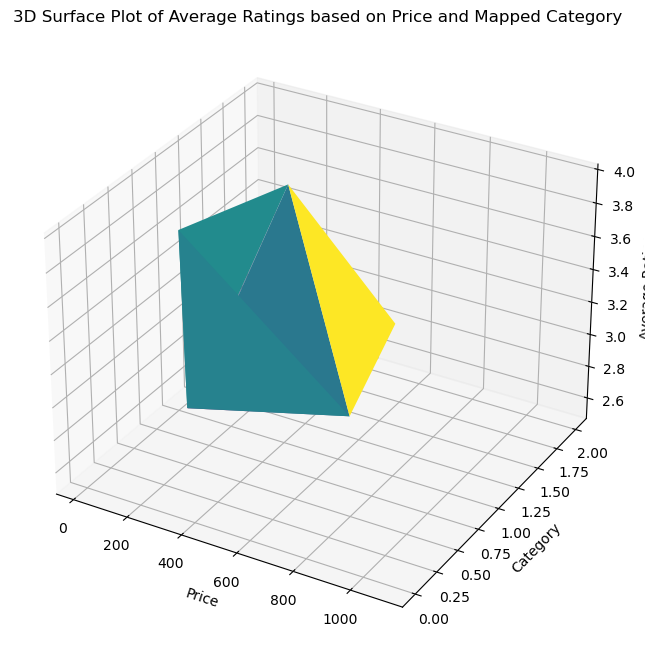

In [22]:
from mpl_toolkits.mplot3d import Axes3D
#Reference https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

# Create a mapping from category to a unique number
category_mapping = {category: i for i, category in enumerate(catalogue_data['Category'].unique())}

# Map the category values to unique numbers
catalogue_data['Category_Num'] = catalogue_data['Category'].map(category_mapping)

# Create a 3D surface plot to visualize user ratings based on product price and the mapped category.
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Data for the plot
x = catalogue_data['Price']
y = catalogue_data['Category_Num']
z = purchase_data.groupby('itemId')['Ratings'].mean()

# Create the 3D surface plot
ax.plot_trisurf(x, y, z, cmap='viridis')
ax.set_xlabel('Price')
ax.set_ylabel('Category')
ax.set_zlabel('Average Rating')
ax.set_title('3D Surface Plot of Average Ratings based on Price and Mapped Category')

plt.show()


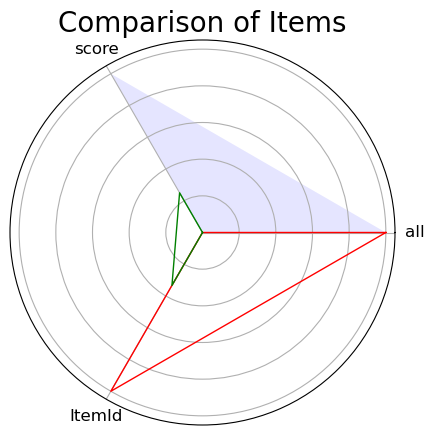

In [23]:
#Reference https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html

data_normalized = rec_list[['all', 'score', 'ItemId']]

data_normalized = (data_normalized - data_normalized.min()) / (data_normalized.max() - data_normalized.min())

# Number of attributes
categories = list(data_normalized)
N = len(categories)

# Set the angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Create the radar chart
plt.figure(figsize=(5, 5))
ax = plt.subplot(111, polar=True)

# Add the first item as a fill
values = data_normalized.iloc[0].tolist()
values += values[:1]
ax.fill(angles, values, 'b', alpha=0.1)

# Add the second item as a line
values = data_normalized.iloc[1].tolist()
values += values[:1]
ax.plot(angles, values, 'r', linewidth=1, linestyle='solid')

# Add the third item as a line
values = data_normalized.iloc[2].tolist()
values += values[:1]
ax.plot(angles, values, 'g', linewidth=1, linestyle='solid')

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_yticklabels([])
ax.set_title("Comparison of Items", size=20, color="black")

plt.show()
